In [1]:
# Importing liabraries
import pandas as pd
import seaborn as sns
from math import pi

In [3]:
# importing the data set
data = pd.read_csv("C:/projects/kaggle/ipl_match.csv")

In [5]:
data.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN
4,Royal Challengers Bengaluru,0,V Kohli,MA Starc,PD Salt,1,0,1,NaN,NaN,NaN,NaN


In [7]:
# Dividing overs
def get_phase(over):
    if over < 6:
        return 'Powerplay'
    elif 6<= over < 15:
        return 'Middle Overs'
    else:
        return 'Death Overs'
        

In [9]:
data['Phase'] = data['over'].apply(get_phase)

In [11]:
# calculating batting strike rate across different phases

In [15]:
import plotly.express as px

batting_intent = (
    data.groupby(['batter','Phase']).agg(balls_faced = ('runs_batter','count'),
                                         total_runs = ('runs_batter','sum')).reset_index())
batting_intent
                                        

,batter,Phase,balls_faced,total_runs
0,AR Patel,Middle Overs,6,8
1,AR Patel,Powerplay,5,7
2,Abishek Porel,Powerplay,7,7
3,B Kumar,Death Overs,4,1
4,D Padikkal,Powerplay,9,1
5,F du Plessis,Powerplay,7,2
6,J Fraser-McGurk,Powerplay,7,7
7,JM Sharma,Middle Overs,11,3
8,KH Pandya,Death Overs,7,5
9,KH Pandya,Middle Overs,11,13


In [19]:
data

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders,Phase
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN,Powerplay
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN,Powerplay
4,Royal Challengers Bengaluru,0,V Kohli,MA Starc,PD Salt,1,0,1,NaN,NaN,NaN,NaN,Powerplay
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Delhi Capitals,17,T Stubbs,Yash Dayal,KL Rahul,1,0,1,NaN,NaN,NaN,NaN,Death Overs
232,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,6,0,6,NaN,NaN,NaN,NaN,Death Overs
233,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,4,0,4,NaN,NaN,NaN,NaN,Death Overs
234,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,0,5,5,wides,NaN,NaN,NaN,Death Overs


In [21]:
batting_intent['strike_rate'] = (batting_intent['total_runs']/batting_intent['balls_faced']) * 100

batting_intent                        

,batter,Phase,balls_faced,total_runs,strike_rate
0,AR Patel,Middle Overs,6,8,133.333333
1,AR Patel,Powerplay,5,7,140.000000
2,Abishek Porel,Powerplay,7,7,100.000000
3,B Kumar,Death Overs,4,1,25.000000
4,D Padikkal,Powerplay,9,1,11.111111
5,F du Plessis,Powerplay,7,2,28.571429
6,J Fraser-McGurk,Powerplay,7,7,100.000000
7,JM Sharma,Middle Overs,11,3,27.272727
8,KH Pandya,Death Overs,7,5,71.428571
9,KH Pandya,Middle Overs,11,13,118.181818


In [27]:
batting_intent = batting_intent[batting_intent['balls_faced']>= 5]
batting_intent.sort_values(by = ['batter','Phase'],inplace = True)
batting_intent

,batter,Phase,balls_faced,total_runs,strike_rate
0,AR Patel,Middle Overs,6,8,133.333333
1,AR Patel,Powerplay,5,7,140.000000
2,Abishek Porel,Powerplay,7,7,100.000000
4,D Padikkal,Powerplay,9,1,11.111111
5,F du Plessis,Powerplay,7,2,28.571429
6,J Fraser-McGurk,Powerplay,7,7,100.000000
7,JM Sharma,Middle Overs,11,3,27.272727
8,KH Pandya,Death Overs,7,5,71.428571
9,KH Pandya,Middle Overs,11,13,118.181818
10,KL Rahul,Death Overs,9,20,222.222222


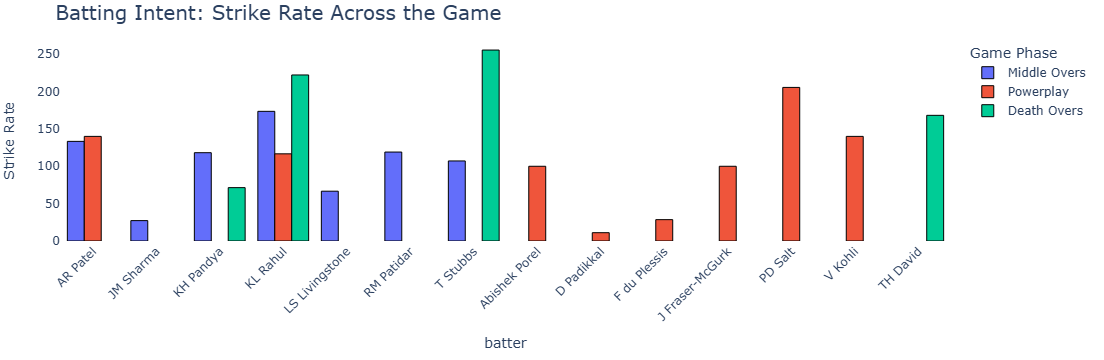

In [141]:
fig = px.bar(
    batting_intent,
    x = 'batter',
    y = 'strike_rate',
    color = 'Phase',
    barmode = 'group',
    title = 'Batting Intent: Strike Rate Across the Game',
    labels = {'strike_rate': 'Strike Rate', ' batter':'Batter'},
    hover_data = {
        'balls_faced':True,
        'total_runs':True,
        'strike_rate':':.2f',
        'Phase':True
    }
)
fig.update_layout(
    xaxis_tickangle = -45,
    title_font_size = 20,
    legend_title ='Game Phase',
    plot_bgcolor = 'rgba(0,0,0,0)',
    paper_bgcolor = 'white',
    bargap = 0.2,
    margin = dict(l= 40, r=40, t=40, b=100)
)
fig.update_traces(marker_line_width = 1, marker_line_color= 'black')
fig.show()

In [39]:
# Team-Wise Batting Intent Across Match Phases

In [45]:
data['batting_team'] = data['team']
data

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders,Phase,batting_team
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru
4,Royal Challengers Bengaluru,0,V Kohli,MA Starc,PD Salt,1,0,1,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Delhi Capitals,17,T Stubbs,Yash Dayal,KL Rahul,1,0,1,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals
232,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,6,0,6,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals
233,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,4,0,4,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals
234,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,0,5,5,wides,NaN,NaN,NaN,Death Overs,Delhi Capitals


In [53]:
team_phase_intent = (
    data.groupby(['batting_team','Phase'])
                    .agg(balls_faced = ('runs_batter','count'),
                         total_runs = ('runs_batter','sum')).reset_index()
)
team_phase_intent

,batting_team,Phase,balls_faced,total_runs
0,Delhi Capitals,Death Overs,18,43
1,Delhi Capitals,Middle Overs,54,82
2,Delhi Capitals,Powerplay,38,37
3,Royal Challengers Bengaluru,Death Overs,33,43
4,Royal Challengers Bengaluru,Middle Overs,54,53
5,Royal Challengers Bengaluru,Powerplay,39,52


In [55]:
team_phase_intent['strike_rate'] = (team_phase_intent['total_runs']/team_phase_intent['balls_faced'] * 100)
team_phase_intent

,batting_team,Phase,balls_faced,total_runs,strike_rate
0,Delhi Capitals,Death Overs,18,43,238.888889
1,Delhi Capitals,Middle Overs,54,82,151.851852
2,Delhi Capitals,Powerplay,38,37,97.368421
3,Royal Challengers Bengaluru,Death Overs,33,43,130.303030
4,Royal Challengers Bengaluru,Middle Overs,54,53,98.148148
5,Royal Challengers Bengaluru,Powerplay,39,52,133.333333


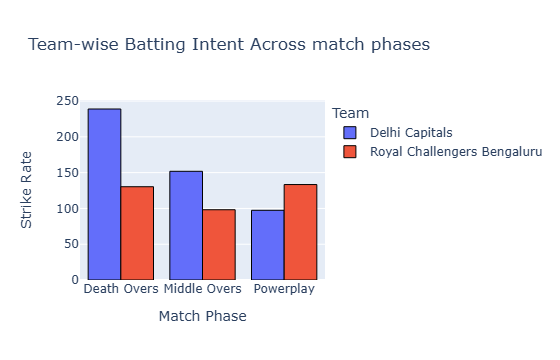

In [57]:
fig = px.bar(
    team_phase_intent,
    x = 'Phase',
    y = 'strike_rate',
    color = 'batting_team',
    barmode = 'group',
    title = 'Team-wise Batting Intent Across match phases',
    labels = {
        'Phase': 'Match Phase',
        'strike_rate':'Strike Rate',
        'batting_team':'Team'
    },
    hover_data = {
        'balls_faced': True,
        'total_runs': True,
        'strike_rate':':.2f'
    }
)
fig.update_traces(marker_line_width = 1, marker_line_color = 'black')
fig.show()

In [59]:
# Boundary % vs Dot Ball % per Batter

In [61]:
import plotly.graph_objects as go

In [65]:
data['ball_outcome'] = data['runs_batter'].apply(
                                lambda x: 'Dot' if x == 0 else('Boundary' if x>=4 else 'Run')
)
data

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders,Phase,batting_team,ball_outcome
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Run
4,Royal Challengers Bengaluru,0,V Kohli,MA Starc,PD Salt,1,0,1,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Delhi Capitals,17,T Stubbs,Yash Dayal,KL Rahul,1,0,1,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Run
232,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,6,0,6,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Boundary
233,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,4,0,4,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Boundary
234,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,0,5,5,wides,NaN,NaN,NaN,Death Overs,Delhi Capitals,Dot


In [87]:
batter_outcome_stats = (
        data.groupby('batter')
        .ball_outcome.value_counts(normalize = True)
        .unstack()
        .fillna(0) * 100
            ).reset_index()
batter_outcome_stats

ball_outcome,batter,Boundary,Dot,Run
0,AR Patel,18.181818,27.272727,54.545455
1,Abishek Porel,14.285714,57.142857,28.571429
2,B Kumar,0.000000,75.000000,25.000000
3,D Padikkal,0.000000,88.888889,11.111111
4,F du Plessis,0.000000,71.428571,28.571429
5,J Fraser-McGurk,14.285714,57.142857,28.571429
6,JM Sharma,0.000000,72.727273,27.272727
7,KH Pandya,5.555556,33.333333,61.111111
8,KL Rahul,23.636364,30.909091,45.454545
9,LS Livingstone,0.000000,33.333333,66.666667


In [89]:
balls_faced = data.groupby('batter').size().reset_index(name = 'balls_faced')
print(balls_faced)


             batter  balls_faced
0          AR Patel           11
1     Abishek Porel            7
2           B Kumar            4
3        D Padikkal            9
4      F du Plessis            7
5   J Fraser-McGurk            7
6         JM Sharma           11
7         KH Pandya           18
8          KL Rahul           55
9    LS Livingstone            6
10          PD Salt           18
11       RM Patidar           23
12         T Stubbs           23
13         TH David           23
14          V Kohli           14


In [91]:
batter_outcome_stats = batter_outcome_stats.merge(balls_faced, on ='batter')
batter_outcome_stats

,batter,Boundary,Dot,Run,balls_faced
0,AR Patel,18.181818,27.272727,54.545455,11
1,Abishek Porel,14.285714,57.142857,28.571429,7
2,B Kumar,0.000000,75.000000,25.000000,4
3,D Padikkal,0.000000,88.888889,11.111111,9
4,F du Plessis,0.000000,71.428571,28.571429,7
5,J Fraser-McGurk,14.285714,57.142857,28.571429,7
6,JM Sharma,0.000000,72.727273,27.272727,11
7,KH Pandya,5.555556,33.333333,61.111111,18
8,KL Rahul,23.636364,30.909091,45.454545,55
9,LS Livingstone,0.000000,33.333333,66.666667,6


In [93]:
batter_outcome_stats = batter_outcome_stats[batter_outcome_stats['balls_faced'] >= 10]
batter_outcome_stats

,batter,Boundary,Dot,Run,balls_faced
0,AR Patel,18.181818,27.272727,54.545455,11
6,JM Sharma,0.000000,72.727273,27.272727,11
7,KH Pandya,5.555556,33.333333,61.111111,18
8,KL Rahul,23.636364,30.909091,45.454545,55
10,PD Salt,38.888889,44.444444,16.666667,18
11,RM Patidar,8.695652,34.782609,56.521739,23
12,T Stubbs,21.739130,8.695652,69.565217,23
13,TH David,26.086957,52.173913,21.739130,23
14,V Kohli,21.428571,35.714286,42.857143,14


In [97]:
batter_outcome_stats = batter_outcome_stats.sort_values(by = 'Boundary', ascending = False)
batter_outcome_stats

,batter,Boundary,Dot,Run,balls_faced
10,PD Salt,38.888889,44.444444,16.666667,18
13,TH David,26.086957,52.173913,21.739130,23
8,KL Rahul,23.636364,30.909091,45.454545,55
12,T Stubbs,21.739130,8.695652,69.565217,23
14,V Kohli,21.428571,35.714286,42.857143,14
0,AR Patel,18.181818,27.272727,54.545455,11
11,RM Patidar,8.695652,34.782609,56.521739,23
7,KH Pandya,5.555556,33.333333,61.111111,18
6,JM Sharma,0.000000,72.727273,27.272727,11


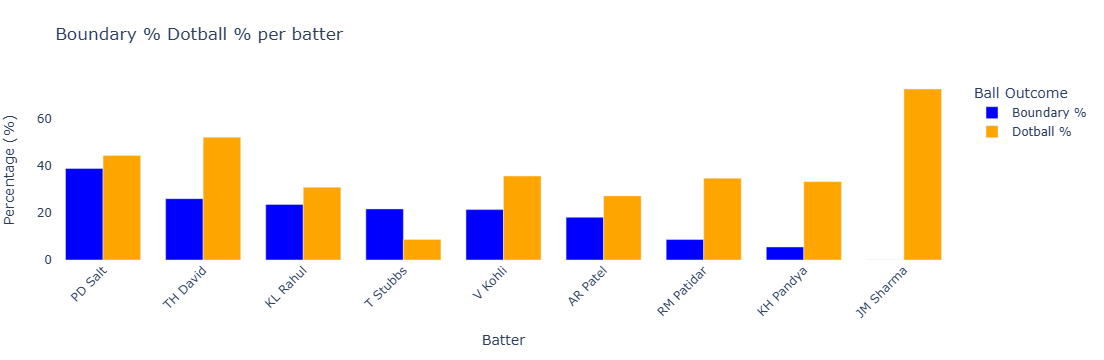

In [215]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = batter_outcome_stats['batter'],
    y = batter_outcome_stats['Boundary'],
    name = 'Boundary %',
    marker_color = 'blue',
    hovertemplate = '%{x}<br>Boundary %: %{y:.2f}<extra></extra>'
))

fig.add_trace(go.Bar(
    x = batter_outcome_stats['batter'],
    y = batter_outcome_stats['Dot'],
    name ='Dotball %',
    marker_color = "orange",
    hovertemplate = '%{x}<br>Dot Ball %: %{y:.2f}<extra></extra>'
))
fig.update_layout(
    title = 'Boundary % Dotball % per batter',
    xaxis_title = 'Batter',
    yaxis_title = 'Percentage (%)',
    barmode = 'group',
    bargap = 0.25,
    plot_bgcolor = 'rgba(0,0,0,0)',
    paper_bgcolor = 'white',
    legend_title_text = 'Ball Outcome',
    xaxis_tickangle = -45,
    margin = dict(l=40, r=40, t=80, b= 100)
)

fig.show()


In [107]:
# Over-wise Run Progression of Top 4 Batters

In [113]:
top_batters = (
    data.groupby('batter')['runs_batter']
    .sum()
    .sort_values(ascending = False)
    .head()
    .index.tolist()
)
top_batters

['KL Rahul', 'T Stubbs', 'PD Salt', 'TH David', 'RM Patidar']

In [115]:
batters_progression = data[data['batter'].isin(top_batters)]
batters_progression

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders,Phase,batting_team,ball_outcome
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Run
5,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Delhi Capitals,17,T Stubbs,Yash Dayal,KL Rahul,1,0,1,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Run
232,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,6,0,6,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Boundary
233,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,4,0,4,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Boundary
234,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,0,5,5,wides,NaN,NaN,NaN,Death Overs,Delhi Capitals,Dot


In [195]:
runs = data.groupby('batter').agg(batsmen_runs = ('runs_batter','sum'),ball = ('ball_outcome','count')).sort_values(by = ['batsmen_runs'],ascending = False)
                                                                        
runs

,batsmen_runs,ball
batter,,
KL Rahul,93,55
T Stubbs,38,23
PD Salt,37,18
TH David,37,23
RM Patidar,25,23
V Kohli,22,14
KH Pandya,18,18
AR Patel,15,11
Abishek Porel,7,7


In [121]:
batters_overwise = (
    batters_progression.groupby(['batter','over'])
    .agg(runs_in_over = ('runs_batter','sum'))
    .reset_index()
)

batters_progression

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders,Phase,batting_team,ball_outcome
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Run
5,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN,Powerplay,Royal Challengers Bengaluru,Dot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Delhi Capitals,17,T Stubbs,Yash Dayal,KL Rahul,1,0,1,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Run
232,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,6,0,6,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Boundary
233,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,4,0,4,NaN,NaN,NaN,NaN,Death Overs,Delhi Capitals,Boundary
234,Delhi Capitals,17,KL Rahul,Yash Dayal,T Stubbs,0,5,5,wides,NaN,NaN,NaN,Death Overs,Delhi Capitals,Dot


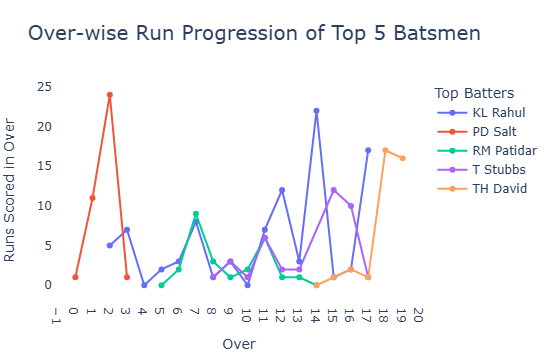

In [123]:
fig = px.line(
    batters_overwise,
    x ='over',
    y = 'runs_in_over',
    color = 'batter',
    markers = True,
    title = 'Over-wise Run Progression of Top 5 Batsmen',
    labels = {
        'over' : 'Over',
        'runs_in_over' :'Runs in Over',
        'batter': 'Batter'
    },
    hover_data = {
        'over' : True,
        'runs_in_over':True,
        'batter':True
    }
)

fig.update_layout(
    xaxis = dict(tickmode = 'linear'),
    yaxis_title = 'Runs Scored in Over',
    legend_title = 'Top Batters',
    title_font_size = 20,
    plot_bgcolor = 'rgba(0,0,0,0)',
    paper_bgcolor = 'white',
    margin = dict(l=40, r=40, t=80, b=60),
    hovermode = 'x unified'
)

fig.show()

In [125]:
# Correlation Batting Tempo with Wicket Falls

In [127]:
wicket_df = data[data['player_out'].notna()]
wicket_df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders,Phase,batting_team,ball_outcome
24,Royal Challengers Bengaluru,3,PD Salt,AR Patel,V Kohli,0,0,0,NaN,run out,PD Salt,"KL Rahul,V Nigam",Powerplay,Royal Challengers Bengaluru,Dot
36,Royal Challengers Bengaluru,5,D Padikkal,Mukesh Kumar,V Kohli,0,0,0,NaN,caught,D Padikkal,AR Patel,Powerplay,Royal Challengers Bengaluru,Dot
44,Royal Challengers Bengaluru,6,V Kohli,V Nigam,RM Patidar,0,0,0,NaN,caught,V Kohli,MA Starc,Middle Overs,Royal Challengers Bengaluru,Dot
59,Royal Challengers Bengaluru,9,LS Livingstone,MM Sharma,RM Patidar,0,0,0,NaN,caught,LS Livingstone,Ashutosh Sharma,Middle Overs,Royal Challengers Bengaluru,Dot
76,Royal Challengers Bengaluru,12,JM Sharma,Kuldeep Yadav,RM Patidar,0,0,0,NaN,caught,JM Sharma,KL Rahul,Middle Overs,Royal Challengers Bengaluru,Dot
91,Royal Challengers Bengaluru,14,RM Patidar,Kuldeep Yadav,KH Pandya,0,0,0,NaN,caught,RM Patidar,KL Rahul,Middle Overs,Royal Challengers Bengaluru,Dot
105,Royal Challengers Bengaluru,17,KH Pandya,V Nigam,TH David,0,0,0,NaN,caught,KH Pandya,Ashutosh Sharma,Death Overs,Royal Challengers Bengaluru,Dot
137,Delhi Capitals,1,F du Plessis,Yash Dayal,J Fraser-McGurk,0,0,0,NaN,caught,F du Plessis,RM Patidar,Powerplay,Delhi Capitals,Dot
139,Delhi Capitals,2,J Fraser-McGurk,B Kumar,Abishek Porel,0,0,0,NaN,caught,J Fraser-McGurk,JM Sharma,Powerplay,Delhi Capitals,Dot
154,Delhi Capitals,4,Abishek Porel,B Kumar,KL Rahul,0,0,0,NaN,caught,Abishek Porel,JM Sharma,Powerplay,Delhi Capitals,Dot


In [131]:
wickets_by_over = wicket_df.groupby('over').size().reset_index(name = 'wickets')
wickets_by_over

,over,wickets
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,8,1
7,9,1
8,12,1
9,14,1


In [133]:
runs_by_over = data.groupby('over')['runs_batter'].sum().reset_index(name = 'total_runs')
runs_by_over

,over,total_runs
0,0,3
1,1,24
2,2,35
3,3,16
4,4,3
5,5,8
6,6,13
7,7,20
8,8,13
9,9,8


In [135]:
overwise_analysis = pd.merge(runs_by_over,
                             wickets_by_over,on = 'over',
                             how = 'left').fillna(0)
overwise_analysis

,over,total_runs,wickets
0,0,3,0.0
1,1,24,1.0
2,2,35,1.0
3,3,16,1.0
4,4,3,1.0
5,5,8,1.0
6,6,13,1.0
7,7,20,0.0
8,8,13,1.0
9,9,8,1.0


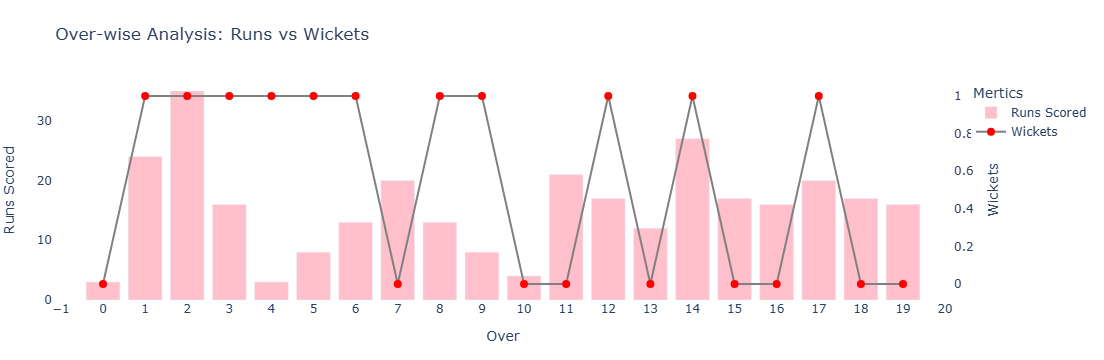

In [165]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = overwise_analysis['over'],
    y = overwise_analysis['total_runs'],
    name = 'Runs Scored',
    marker_color = 'Pink',
    hovertemplate = 'Over %{x}<br>Runs: %{y}<extra></extra>'
))

fig.add_trace(go.Scatter(
    x = overwise_analysis['over'],
    y = overwise_analysis['wickets'],
    name = 'Wickets',
    mode = 'lines+markers',
    marker = dict(color = 'red',size=8),
    line= dict(width= 2, color = 'grey'),
    yaxis = 'y2',
    hovertemplate = 'over %{x}<br>wickets: %{y}<extra></extra>'
))

fig.update_layout(
    title = 'Over-wise Analysis: Runs vs Wickets',
    xaxis = dict(title = 'Over', tickmode = 'linear'),
    yaxis = dict(title ='Runs Scored'),
    yaxis2 = dict(title='Wickets',overlaying = 'y', side = 'right'),
    legend_title = 'Mertics',
    plot_bgcolor = 'rgba(0,0,0,0)',
    paper_bgcolor = 'white',
    margin = dict(l=40, r=40, t=80,b=60),
    hovermode = 'x unified')

fig.show()